In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read COVID-19 data file
covid19data_path = "Resources/CRDTData.csv"
covid19_initial_results = pd.read_csv(covid19data_path)

covid19_initial_results

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,20200412,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5316,20200412,WA,10411.0,2903.0,289.0,1180.0,451.0,41.0,61.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,20200412,WI,3341.0,1680.0,857.0,NaN,81.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,20200412,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Create Case Total Dataframe
covid_case_totals = covid19_initial_results.groupby(['State']).sum()[['Cases_White', 'Cases_Black',
                                                                      'Cases_Asian', 'Cases_Ethnicity_Hispanic']]

covid_case_totals.head()

,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic
State,,,,
AK,574849.0,56782.0,73005.0,106683.0
AL,5601494.0,3373720.0,70420.0,651897.0
AR,6652666.0,1890196.0,105929.0,1452815.0
AS,0.0,0.0,0.0,0.0
AZ,8458144.0,815793.0,332233.0,7947570.0


In [137]:
#Re-Index 
#covid_case_totals.reset_index().head()
covid_case_totals = covid_case_totals.reset_index()

In [138]:
#Case Totals for neighboring states
covid_case_totals_nbr = covid_case_totals.loc[(covid_case_totals['State'] == 'AL') |
                                              (covid_case_totals['State'] == 'GA') |
                                              (covid_case_totals['State'] == 'KY') |
                                              (covid_case_totals['State'] == 'NC') |
                                              (covid_case_totals['State'] == 'SC') |
                                              (covid_case_totals['State'] == 'TN') |
                                              (covid_case_totals['State'] == 'VA') ]

covid_case_totals_nbr

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic
1,AL,5601494.0,3373720.0,70420.0,651897.0
11,GA,10976669.0,8186713.0,581186.0,3682675.0
19,KY,7631804.0,848828.0,115688.0,608241.0
30,NC,13422999.0,4727544.0,416843.0,4764432.0
44,SC,7153989.0,3780225.0,158259.0,1111875.0
46,TN,15280682.0,3786519.0,231751.0,2293217.0
49,VA,6711997.0,3243142.0,586774.0,3466213.0


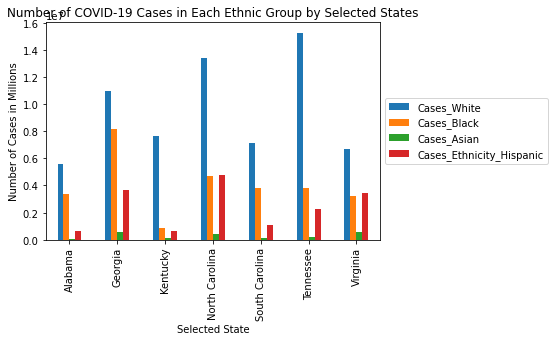

In [139]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_case_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Cases in Each Ethnic Group by Selected States")
plt.xlabel("Selected State")
plt.ylabel("Number of Cases in Millions")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [140]:
#Create Death Total Dataframe
covid_death_totals = covid19_initial_results.groupby(['State']).sum()[['Deaths_White', 'Deaths_Black',
                                                                      'Deaths_Asian', 'Deaths_Ethnicity_Hispanic']]

covid_death_totals.head()

,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
State,,,,
AK,3536.0,293.0,869.0,270.0
AL,147134.0,88269.0,865.0,6077.0
AR,122609.0,28447.0,1347.0,7435.0
AS,0.0,0.0,0.0,0.0
AZ,246312.0,15778.0,6473.0,158181.0


In [141]:
#covid_deaths_totals.reset_index().head()
covid_death_totals = covid_death_totals.reset_index()

In [142]:
#death totals on nearby states
covid_death_totals_nbr = covid_death_totals.loc[(covid_death_totals['State'] == 'AL') |
                                              (covid_death_totals['State'] == 'GA') |
                                              (covid_death_totals['State'] == 'KY') |
                                              (covid_death_totals['State'] == 'NC') |
                                              (covid_death_totals['State'] == 'SC') |
                                              (covid_death_totals['State'] == 'TN') |
                                              (covid_death_totals['State'] == 'VA') ]

covid_death_totals_nbr

,State,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
1,AL,147134.0,88269.0,865.0,6077.0
11,GA,328278.0,245390.0,11267.0,36299.0
19,KY,119245.0,15034.0,1123.0,3291.0
30,NC,232906.0,101706.0,4495.0,29272.0
44,SC,160259.0,99050.0,2155.0,8757.0
46,TN,244441.0,70377.0,2314.0,13021.0
49,VA,184300.0,77269.0,12697.0,26990.0


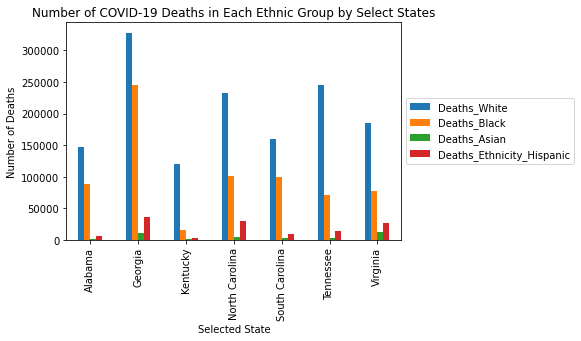

In [143]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_death_totals_nbr.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Number of COVID-19 Deaths in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Number of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [144]:
#Merge Dataframes
covid_merge = pd.merge(covid_case_totals_nbr, covid_death_totals_nbr, on="State", how="inner")
covid_merge

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic
0,AL,5601494.0,3373720.0,70420.0,651897.0,147134.0,88269.0,865.0,6077.0
1,GA,10976669.0,8186713.0,581186.0,3682675.0,328278.0,245390.0,11267.0,36299.0
2,KY,7631804.0,848828.0,115688.0,608241.0,119245.0,15034.0,1123.0,3291.0
3,NC,13422999.0,4727544.0,416843.0,4764432.0,232906.0,101706.0,4495.0,29272.0
4,SC,7153989.0,3780225.0,158259.0,1111875.0,160259.0,99050.0,2155.0,8757.0
5,TN,15280682.0,3786519.0,231751.0,2293217.0,244441.0,70377.0,2314.0,13021.0
6,VA,6711997.0,3243142.0,586774.0,3466213.0,184300.0,77269.0,12697.0,26990.0


In [145]:
covid_merge['Death Percentage White'] = (covid_merge['Deaths_White'] / covid_merge['Cases_White']) * 100
covid_merge['Death Percentage Black'] = (covid_merge['Deaths_Black'] / covid_merge['Cases_Black']) * 100
covid_merge['Death Percentage Asian'] = (covid_merge['Deaths_Asian'] / covid_merge['Cases_Asian']) * 100
covid_merge['Death Percentage Hispanic'] = (covid_merge['Deaths_Ethnicity_Hispanic'] / covid_merge['Cases_Ethnicity_Hispanic']) * 100
covid_merge

,State,Cases_White,Cases_Black,Cases_Asian,Cases_Ethnicity_Hispanic,Deaths_White,Deaths_Black,Deaths_Asian,Deaths_Ethnicity_Hispanic,Death Percentage White,Death Percentage Black,Death Percentage Asian,Death Percentage Hispanic
0,AL,5601494.0,3373720.0,70420.0,651897.0,147134.0,88269.0,865.0,6077.0,2.626692,2.616370,1.228344,0.932202
1,GA,10976669.0,8186713.0,581186.0,3682675.0,328278.0,245390.0,11267.0,36299.0,2.990689,2.997418,1.938622,0.985669
2,KY,7631804.0,848828.0,115688.0,608241.0,119245.0,15034.0,1123.0,3291.0,1.562475,1.771148,0.970714,0.541068
3,NC,13422999.0,4727544.0,416843.0,4764432.0,232906.0,101706.0,4495.0,29272.0,1.735126,2.151350,1.078344,0.614386
4,SC,7153989.0,3780225.0,158259.0,1111875.0,160259.0,99050.0,2155.0,8757.0,2.240135,2.620214,1.361692,0.787589
5,TN,15280682.0,3786519.0,231751.0,2293217.0,244441.0,70377.0,2314.0,13021.0,1.599673,1.858620,0.998485,0.567805
6,VA,6711997.0,3243142.0,586774.0,3466213.0,184300.0,77269.0,12697.0,26990.0,2.745830,2.382535,2.163865,0.778660


In [148]:
covid_merge_perc = covid_merge.loc[:, ['State', 'Death Percentage White', 'Death Percentage Black', 'Death Percentage Asian', 'Death Percentage Hispanic']]
covid_merge_perc

,State,Death Percentage White,Death Percentage Black,Death Percentage Asian,Death Percentage Hispanic
0,AL,2.626692,2.616370,1.228344,0.932202
1,GA,2.990689,2.997418,1.938622,0.985669
2,KY,1.562475,1.771148,0.970714,0.541068
3,NC,1.735126,2.151350,1.078344,0.614386
4,SC,2.240135,2.620214,1.361692,0.787589
5,TN,1.599673,1.858620,0.998485,0.567805
6,VA,2.745830,2.382535,2.163865,0.778660


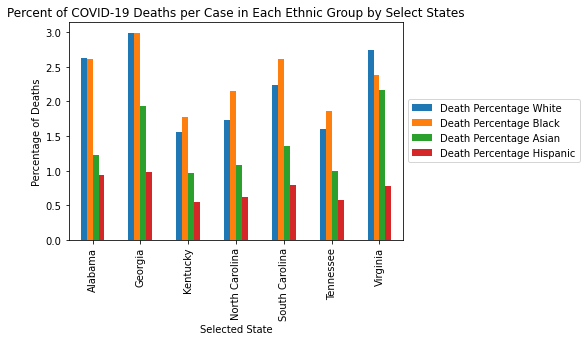

In [150]:
#Bar Chart for Total Cases in each State
states = ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"]
x_axis = np.arange(len(states))

covid_merge_perc.plot(kind='bar')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Alabama", "Georgia", "Kentucky", "North Carolina", "South Carolina", "Tennessee", "Virginia"])
plt.title("Percent of COVID-19 Deaths per Case in Each Ethnic Group by Select States")
plt.xlabel("Selected State")
plt.ylabel("Percentage of Deaths")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [102]:
#cases by state by ethnicity
case_al_white = covid_case_totals_nbr.iloc[0]['Cases_White']
case_ga_white = covid_case_totals_nbr.iloc[1]['Cases_White']
case_ky_white = covid_case_totals_nbr.iloc[2]['Cases_White']
case_nc_white = covid_case_totals_nbr.iloc[3]['Cases_White']
case_sc_white = covid_case_totals_nbr.iloc[4]['Cases_White']
case_tn_white = covid_case_totals_nbr.iloc[5]['Cases_White']
case_va_white = covid_case_totals_nbr.iloc[6]['Cases_White']
case_al_black = covid_case_totals_nbr.iloc[0]['Cases_Black']
case_ga_black = covid_case_totals_nbr.iloc[1]['Cases_Black']
case_ky_black = covid_case_totals_nbr.iloc[2]['Cases_Black']
case_nc_black = covid_case_totals_nbr.iloc[3]['Cases_Black']
case_sc_black = covid_case_totals_nbr.iloc[4]['Cases_Black']
case_tn_black = covid_case_totals_nbr.iloc[5]['Cases_Black']
case_va_black = covid_case_totals_nbr.iloc[6]['Cases_Black']
case_al_asian = covid_case_totals_nbr.iloc[0]['Cases_Asian']
case_ga_asian = covid_case_totals_nbr.iloc[1]['Cases_Asian']
case_ky_asian = covid_case_totals_nbr.iloc[2]['Cases_Asian']
case_nc_asian = covid_case_totals_nbr.iloc[3]['Cases_Asian']
case_sc_asian = covid_case_totals_nbr.iloc[4]['Cases_Asian']
case_tn_asian = covid_case_totals_nbr.iloc[5]['Cases_Asian']
case_va_asian = covid_case_totals_nbr.iloc[6]['Cases_Asian']
case_al_hispanic = covid_case_totals_nbr.iloc[0]['Cases_Ethnicity_Hispanic']
case_ga_hispanic = covid_case_totals_nbr.iloc[1]['Cases_Ethnicity_Hispanic']
case_ky_hispanic = covid_case_totals_nbr.iloc[2]['Cases_Ethnicity_Hispanic']
case_nc_hispanic = covid_case_totals_nbr.iloc[3]['Cases_Ethnicity_Hispanic']
case_sc_hispanic = covid_case_totals_nbr.iloc[4]['Cases_Ethnicity_Hispanic']
case_tn_hispanic = covid_case_totals_nbr.iloc[5]['Cases_Ethnicity_Hispanic']
case_va_hispanic = covid_case_totals_nbr.iloc[6]['Cases_Ethnicity_Hispanic']

case_va_black

3243142.0

In [107]:
#deaths by state by ethnicity
death_al_white = covid_death_totals_nbr.iloc[0]['Deaths_White']
death_ga_white = covid_death_totals_nbr.iloc[1]['Deaths_White']
death_ky_white = covid_death_totals_nbr.iloc[2]['Deaths_White']
death_nc_white = covid_death_totals_nbr.iloc[3]['Deaths_White']
death_sc_white = covid_death_totals_nbr.iloc[4]['Deaths_White']
death_tn_white = covid_death_totals_nbr.iloc[5]['Deaths_White']
death_va_white = covid_death_totals_nbr.iloc[6]['Deaths_White']
death_al_black = covid_death_totals_nbr.iloc[0]['Deaths_Black']
death_ga_black = covid_death_totals_nbr.iloc[1]['Deaths_Black']
death_ky_black = covid_death_totals_nbr.iloc[2]['Deaths_Black']
death_nc_black = covid_death_totals_nbr.iloc[3]['Deaths_Black']
death_sc_black = covid_death_totals_nbr.iloc[4]['Deaths_Black']
death_tn_black = covid_death_totals_nbr.iloc[5]['Deaths_Black']
death_va_black = covid_death_totals_nbr.iloc[6]['Deaths_Black']
death_al_asian = covid_death_totals_nbr.iloc[0]['Deaths_Asian']
death_ga_asian = covid_death_totals_nbr.iloc[1]['Deaths_Asian']
death_ky_asian = covid_death_totals_nbr.iloc[2]['Deaths_Asian']
death_nc_asian = covid_death_totals_nbr.iloc[3]['Deaths_Asian']
death_sc_asian = covid_death_totals_nbr.iloc[4]['Deaths_Asian']
death_tn_asian = covid_death_totals_nbr.iloc[5]['Deaths_Asian']
death_va_asian = covid_death_totals_nbr.iloc[6]['Deaths_Asian']
death_al_hispanic = covid_death_totals_nbr.iloc[0]['Deaths_Ethnicity_Hispanic']
death_ga_hispanic = covid_death_totals_nbr.iloc[1]['Deaths_Ethnicity_Hispanic']
death_ky_hispanic = covid_death_totals_nbr.iloc[2]['Deaths_Ethnicity_Hispanic']
death_nc_hispanic = covid_death_totals_nbr.iloc[3]['Deaths_Ethnicity_Hispanic']
death_sc_hispanic = covid_death_totals_nbr.iloc[4]['Deaths_Ethnicity_Hispanic']
death_tn_hispanic = covid_death_totals_nbr.iloc[5]['Deaths_Ethnicity_Hispanic']
death_va_hispanic = covid_death_totals_nbr.iloc[6]['Deaths_Ethnicity_Hispanic']

In [108]:
#percentage deaths by cases
death_perc_al_white = (death_al_white / case_al_white)
death_perc_ga_white = (death_ga_white / case_ga_white)
death_perc_ky_white = (death_ky_white / case_ky_white)
death_perc_nc_white = (death_nc_white / case_nc_white)
death_perc_sc_white = (death_sc_white / case_sc_white)
death_perc_tn_white = (death_tn_white / case_tn_white)
death_perc_va_white = (death_va_white / case_va_white)
death_perc_al_black = (death_al_black / case_al_black)
death_perc_ga_black = (death_ga_black / case_ga_black)
death_perc_ky_black = (death_ky_black / case_ky_black)
death_perc_nc_black = (death_nc_black / case_nc_black)
death_perc_sc_black = (death_sc_black / case_sc_black)
death_perc_tn_black = (death_tn_black / case_tn_black)
death_perc_va_black = (death_va_black / case_va_black)
death_perc_al_asian = (death_al_asian / case_al_asian)
death_perc_ga_asian = (death_ga_asian / case_ga_asian)
death_perc_ky_asian = (death_ky_asian / case_ky_asian)
death_perc_nc_asian = (death_nc_asian / case_nc_asian)
death_perc_sc_asian = (death_sc_asian / case_sc_asian)
death_perc_tn_asian = (death_tn_asian / case_tn_asian)
death_perc_va_asian = (death_va_asian / case_va_asian)
death_perc_al_hispanic = (death_al_hispanic / case_al_hispanic)
death_perc_ga_hispanic = (death_ga_hispanic / case_ga_hispanic)
death_perc_ky_hispanic = (death_ky_hispanic / case_ky_hispanic)
death_perc_nc_hispanic = (death_nc_hispanic / case_nc_hispanic)
death_perc_sc_hispanic = (death_sc_hispanic / case_sc_hispanic)
death_perc_tn_hispanic = (death_tn_hispanic / case_tn_hispanic)
death_perc_va_hispanic = (death_va_hispanic / case_va_hispanic)



(-1.147214908560096,
 1.1022483289790475,
 -1.1227952345522014,
 1.2130713875703831)

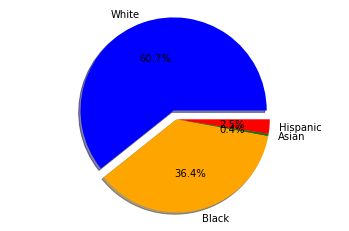

In [96]:
al_death_ethn = [death_al_white, death_al_black, death_al_asian, death_al_hispanic]
labels = ["White", "Black", "Asian", "Hispanic"]
colors = ["blue", "orange", "green", "red"]
explode = (0.1, 0, 0, 0)

plt.pie(al_death_ethn, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")